In [1]:
# plot y = sin x at each step
# plot the results of the q-function at each step

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import torch

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

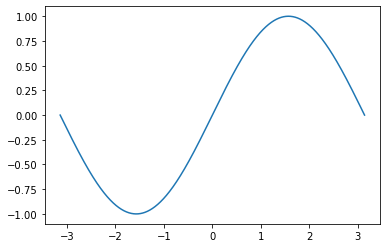

In [4]:
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

plt.figure()
plt.plot(x, y)

xx = x.unsqueeze(-1).pow(torch.tensor([1, 2, 3]))

Model predictions:  tensor([12.8845, 12.8472, 12.8100,  ..., -7.3413, -7.3677, -7.3942],
       grad_fn=<ViewBackward>)
Result:  tensor([ 7.7340,  7.7135,  7.6931,  ..., -7.1023, -7.1227, -7.1432])


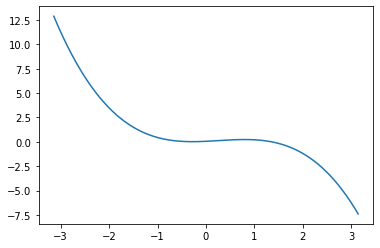

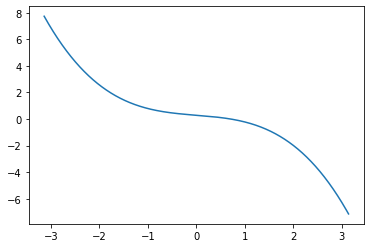

Model predictions:  tensor([0.0515, 0.0469, 0.0422,  ..., 0.0261, 0.0217, 0.0173],
       grad_fn=<ViewBackward>)
Result:  tensor([  8.1335,   8.1093,   8.0851,  ..., -12.2433, -12.2767, -12.3101])


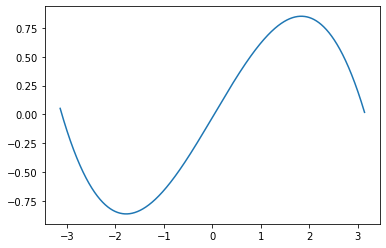

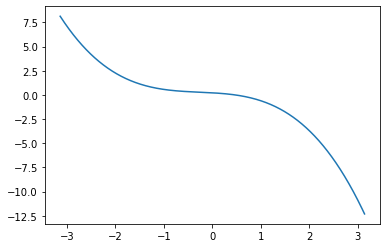

Model predictions:  tensor([ 0.1865,  0.1807,  0.1748,  ..., -0.1584, -0.1642, -0.1700],
       grad_fn=<ViewBackward>)
Result:  tensor([  8.9258,   8.8991,   8.8725,  ..., -13.2462, -13.2825, -13.3189])


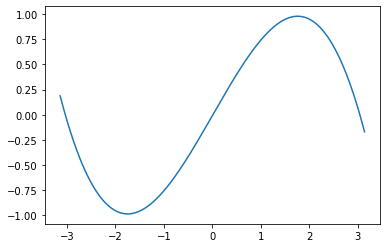

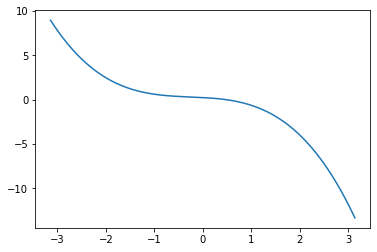

Model predictions:  tensor([ 0.2007,  0.1947,  0.1888,  ..., -0.1859, -0.1918, -0.1978],
       grad_fn=<ViewBackward>)
Result:  tensor([  8.9916,   8.9647,   8.9379,  ..., -13.3445, -13.3811, -13.4177])


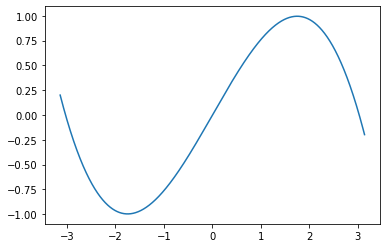

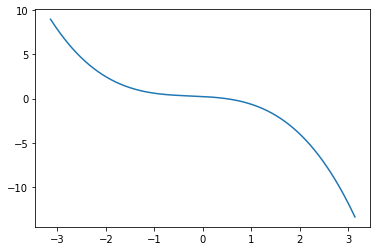

In [20]:
model = torch.nn.Sequential(
    torch.nn.Linear(3, 10),
    torch.nn.Linear(10, 1),
    torch.nn.Flatten(0, 1)
)

loss_fn = torch.nn.MSELoss(reduction='sum')
lr = 1e-6

for t in range(2000):
    y_pred = model(xx)
    loss = loss_fn(y_pred, y)
    
    linear_layer = model[1]
    y_result = linear_layer.bias.item() + \ # correct this
           linear_layer.weight[:, 0].item()*x + \
           linear_layer.weight[:, 1].item()*x**2 + \
           linear_layer.weight[:, 2].item()*x**3
    
    if t % 500 == 0:
        print('Model predictions: ', y_pred)
        print('Result: ', y_result)
        plt.plot(x, y_pred.detach())
        plt.show()
        plt.plot(x, y_result.detach())
        plt.show()
        
    model.zero_grad()
    loss.backward()
    
    with torch.no_grad():
        for param in model.parameters():
            param -= lr * param.grad

In [6]:
# how can we calculate the loss at each step if we don't know what y = sin x actually looks like? 
# what are our actual q values?
# what are our predicted q values?

In [7]:
linear_layer = model[1]
linear_layer.weight[:, 0]

tensor([-0.1136], grad_fn=<SelectBackward>)

In [8]:
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

Result: y = 0.2195865958929062 + -0.11355840414762497 x + 0.16688930988311768 x^2 + -0.23495037853717804 x^3


In [9]:
y_result = linear_layer.bias.item() + \
           linear_layer.weight[:, 0].item()*x + \
           linear_layer.weight[:, 1].item()*x**2 + \
           linear_layer.weight[:, 2].item()*x**3

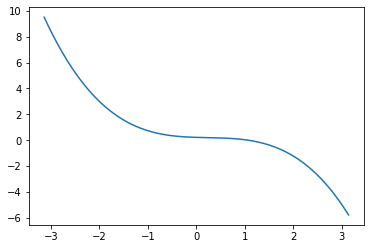

In [10]:
plt.plot(x, y_result)

In [16]:
x

tensor([-3.1416, -3.1384, -3.1353,  ...,  3.1353,  3.1384,  3.1416])

In [17]:
xx

tensor([[ -3.1416,   9.8696, -31.0063],
        [ -3.1384,   9.8499, -30.9133],
        [ -3.1353,   9.8301, -30.8205],
        ...,
        [  3.1353,   9.8301,  30.8205],
        [  3.1384,   9.8499,  30.9133],
        [  3.1416,   9.8696,  31.0063]])

In [21]:
layer = torch.nn.Linear(3, 10)

In [22]:
layer(xx)

tensor([[  0.1600,  -1.9655,   6.5284,  ...,  23.6018,   4.5600, -10.3251],
        [  0.1649,  -1.9596,   6.5087,  ...,  23.5383,   4.5456, -10.2994],
        [  0.1698,  -1.9536,   6.4891,  ...,  23.4749,   4.5312, -10.2738],
        ...,
        [  9.1791,  -1.6364,   1.0910,  ..., -14.2079,  -0.5992,   3.1756],
        [  9.2005,  -1.6397,   1.0874,  ..., -14.2523,  -0.6047,   3.1848],
        [  9.2220,  -1.6431,   1.0837,  ..., -14.2968,  -0.6101,   3.1941]],
       grad_fn=<AddmmBackward>)

In [23]:
xx

tensor([[ -3.1416,   9.8696, -31.0063],
        [ -3.1384,   9.8499, -30.9133],
        [ -3.1353,   9.8301, -30.8205],
        ...,
        [  3.1353,   9.8301,  30.8205],
        [  3.1384,   9.8499,  30.9133],
        [  3.1416,   9.8696,  31.0063]])

In [29]:
layer.weight

Parameter containing:
tensor([[ 0.0635,  0.4197,  0.1397],
        [-0.1319, -0.2355,  0.0186],
        [ 0.5547,  0.4046, -0.1440],
        [ 0.3944, -0.0567, -0.0577],
        [-0.5323,  0.3077,  0.1361],
        [ 0.2623, -0.5704, -0.2580],
        [-0.5647,  0.3529,  0.5733],
        [-0.4472,  0.4827, -0.5658],
        [ 0.3471,  0.2250, -0.1185],
        [ 0.4465, -0.4140,  0.1728]], requires_grad=True)

In [30]:
layer.bias

Parameter containing:
tensor([ 0.5491,  0.5200, -0.1874,  0.3113, -0.2349, -0.4802, -0.1245, -0.1113,
        -0.2457,  0.5203], requires_grad=True)

In [52]:
layer.weight.detach()

tensor([[ 0.0635,  0.4197,  0.1397],
        [-0.1319, -0.2355,  0.0186],
        [ 0.5547,  0.4046, -0.1440],
        [ 0.3944, -0.0567, -0.0577],
        [-0.5323,  0.3077,  0.1361],
        [ 0.2623, -0.5704, -0.2580],
        [-0.5647,  0.3529,  0.5733],
        [-0.4472,  0.4827, -0.5658],
        [ 0.3471,  0.2250, -0.1185],
        [ 0.4465, -0.4140,  0.1728]])

In [44]:
xx

tensor([[ -3.1416,   9.8696, -31.0063],
        [ -3.1384,   9.8499, -30.9133],
        [ -3.1353,   9.8301, -30.8205],
        ...,
        [  3.1353,   9.8301,  30.8205],
        [  3.1384,   9.8499,  30.9133],
        [  3.1416,   9.8696,  31.0063]])

In [53]:
# use dot product to get the same result as layer(xx)